In [104]:
import pandas as pd
import numpy as np 
 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import random

In [2]:
data = pd.read_csv('data_violencia_2015_2020.csv')

## Se filtraron los datos para analizar unicamente elos homicidios 

In [3]:
data_hom = data[data['Tipo de delito']=='Homicidio']

 Ver formato del nombre de las columnas y cambiarlo por uno adecuado

In [4]:
data_hom.columns

Index(['Año', 'Clave_Ent', 'Entidad', 'Cve. Municipio', 'Municipio',
       'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito',
       'Modalidad', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype='object')

In [5]:
data_hom2 = data_hom.rename({'Año': 'Anio', 'Cve. Municipio':'Clave_Municipio',
                'Bien jurídico afectado':'Bien_juridico_afectado', 'Tipo de delito':'Tipo_de_delito', 
                'Subtipo de delito':'Subtipo_de_delito'}, axis=1)

In [6]:
data_hom2

,Anio,Clave_Ent,Entidad,Clave_Municipio,Municipio,Bien_juridico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Enero,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,...,1,1,0,1,1,0,2,1,0,1
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,...,0,0,0,1,0,1,0,0,0,0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,...,1,1,3,2,0,1,2,0,0,0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,...,0,1,0,0,0,0,0,0,0,0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346524,2020,32,Zacatecas,32058,Santa María de la Paz,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,...,0,0,0,0,0,0,0,0,0,0
1346525,2020,32,Zacatecas,32058,Santa María de la Paz,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma blanca,0,...,0,0,0,0,0,0,0,0,0,0
1346526,2020,32,Zacatecas,32058,Santa María de la Paz,La vida y la Integridad corporal,Homicidio,Homicidio culposo,En accidente de tránsito,0,...,0,0,0,0,0,0,0,0,0,0
1346527,2020,32,Zacatecas,32058,Santa María de la Paz,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con otro elemento,0,...,0,0,0,0,0,0,0,0,0,0


Se eliminaron las columnas que no se utilizaran para el analisis 

In [72]:
data_hom3 = data_hom2.drop(columns=['Bien_juridico_afectado', 'Subtipo_de_delito', 'Modalidad', 'Clave_Ent', 
                                   'Clave_Municipio', 'Tipo_de_delito', 'Municipio'])

In [73]:
data_hom3

,Anio,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,Aguascalientes,2,0,1,1,0,1,1,0,2,1,0,1
1,2015,Aguascalientes,1,1,0,0,0,1,0,1,0,0,0,0
2,2015,Aguascalientes,0,0,1,1,3,2,0,1,2,0,0,0
3,2015,Aguascalientes,1,0,0,1,0,0,0,0,0,0,0,0
4,2015,Aguascalientes,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346524,2020,Zacatecas,0,0,0,0,0,0,0,0,0,0,0,0
1346525,2020,Zacatecas,0,0,0,0,0,0,0,0,0,0,0,0
1346526,2020,Zacatecas,0,0,0,0,0,0,0,0,0,0,0,0
1346527,2020,Zacatecas,0,0,0,0,0,0,0,0,0,0,0,0


Se contabilizaron el numero de homicidios y se agrego la columna al DF

In [74]:
data_hom3['Total_homicidios'] = data_hom3.iloc[:,2:14].sum(axis=1)

In [71]:
data_hom3.head(10)

,Anio,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_homicidios
0,2015,Aguascalientes,2,0,1,1,0,1,1,0,2,1,0,1,10
1,2015,Aguascalientes,1,1,0,0,0,1,0,1,0,0,0,0,4
2,2015,Aguascalientes,0,0,1,1,3,2,0,1,2,0,0,0,10
3,2015,Aguascalientes,1,0,0,1,0,0,0,0,0,0,0,0,2
4,2015,Aguascalientes,0,0,0,0,1,0,0,0,0,0,0,0,1
5,2015,Aguascalientes,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2015,Aguascalientes,9,10,3,11,6,4,6,6,11,6,3,7,82
7,2015,Aguascalientes,0,0,0,0,0,1,0,0,0,0,0,0,1
8,2015,Aguascalientes,1,0,0,3,0,0,0,0,0,0,0,0,4
98,2015,Aguascalientes,0,0,0,0,0,0,0,0,0,0,0,0,0


## Se genero el DF de homicidios del 2015 - 2020, agrupado por entidad

In [80]:
homicidios_entidad = data_hom3.groupby(['Anio','Entidad'],as_index=False).sum()

In [81]:
homicidios_entidad

,Anio,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_homicidios
0,2015,Aguascalientes,22,20,14,21,18,16,16,14,27,16,9,18,211
1,2015,Baja California,75,83,87,94,93,106,113,114,120,110,118,106,1219
2,2015,Baja California Sur,20,11,11,22,18,17,17,28,32,9,10,6,201
3,2015,Campeche,13,7,18,10,10,13,2,9,8,10,6,12,118
4,2015,Chiapas,124,149,145,162,134,116,122,128,115,132,107,118,1552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2020,Tamaulipas,100,132,104,107,99,95,111,121,104,112,94,84,1263
188,2020,Tlaxcala,19,17,16,8,8,9,11,11,22,8,15,6,150
189,2020,Veracruz de Ignacio de la Llave,170,161,205,183,146,208,175,206,152,148,185,236,2175
190,2020,Yucatán,10,19,20,7,4,17,12,14,8,13,13,16,153


In [82]:
homicidios_entidad.describe()

,Anio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_homicidios
count,192.00000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.00000
mean,2017.50000,100.140625,96.911458,106.041667,102.307292,107.781250,102.104167,105.250000,107.291667,104.093750,106.328125,105.276042,110.036458,1253.56250
std,1.71229,81.350357,75.617718,85.741779,83.200788,85.449928,81.854740,83.265299,83.241705,83.299507,85.713950,83.762265,88.650875,982.60681
min,2015.00000,0.000000,5.000000,0.000000,0.000000,4.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,0.000000,84.00000
25%,2016.00000,35.500000,33.000000,38.750000,35.000000,40.750000,34.000000,40.000000,36.750000,36.000000,35.500000,36.000000,41.500000,460.25000
50%,2017.50000,85.500000,83.500000,90.500000,81.500000,89.000000,85.500000,93.500000,90.000000,86.000000,89.500000,90.000000,84.500000,1020.50000
75%,2019.00000,143.000000,143.250000,145.000000,147.750000,160.250000,145.250000,152.000000,148.000000,143.500000,148.000000,150.500000,159.500000,1748.00000
max,2020.00000,443.000000,400.000000,444.000000,399.000000,403.000000,392.000000,418.000000,392.000000,431.000000,430.000000,408.000000,416.000000,4940.00000


In [15]:
#homicidios_entidad.to_csv('data_homicidios_2020.csv', index=False)

In [ ]:
# ANALIZAR LOS DATSO PARA EL AÑO 2020

{'whiskers': [<matplotlib.lines.Line2D at 0x22bc44c21a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22bc44c2800>,
 'boxes': [<matplotlib.lines.Line2D at 0x22bc44c1ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x22bc44c2ce0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22bc44c2fb0>],
 'means': []}

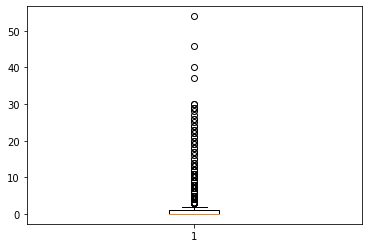

In [17]:
plt.boxplot(homi_2015['Enero'])

(array([1.823e+03, 6.100e+01, 1.700e+01, 1.000e+01, 9.000e+00, 7.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  5.4, 10.8, 16.2, 21.6, 27. , 32.4, 37.8, 43.2, 48.6, 54. ]),
 <BarContainer object of 10 artists>)

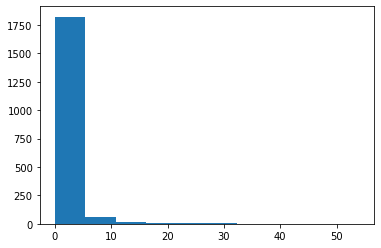

In [18]:
plt.hist(homi_2015['Enero'])

### Se analizará el año 2020, por lo cual se va a filtrar el DF para este año. 

In [83]:
homi_2020 = homicidios_entidad[homicidios_entidad.loc[:, 'Anio']==2020]

In [84]:
homi_2020

,Anio,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_homicidios
160,2020,Aguascalientes,15,16,22,21,23,20,23,21,12,14,19,15,221
161,2020,Baja California,226,206,262,243,269,226,280,294,274,248,265,269,3062
162,2020,Baja California Sur,11,11,7,6,7,9,10,14,7,13,8,15,118
163,2020,Campeche,8,14,17,4,9,6,12,9,10,11,9,13,122
164,2020,Chiapas,100,85,92,84,78,70,92,111,85,86,94,88,1065
165,2020,Chihuahua,180,202,255,243,220,247,226,269,184,216,166,158,2566
166,2020,Ciudad de México,159,145,171,162,149,145,137,129,125,154,131,156,1763
167,2020,Coahuila de Zaragoza,47,26,39,28,22,34,40,32,28,36,36,22,390
168,2020,Colima,64,65,55,64,60,51,48,33,50,56,58,53,657
169,2020,Durango,18,33,32,26,23,21,30,36,26,25,21,23,314


In [85]:
homi_2020.describe()

,Anio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_homicidios
count,32.0,32.00000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2020.0,111.90625,108.343750,125.09375,112.031250,106.937500,107.875000,112.218750,118.250000,107.906250,115.625000,112.781250,113.062500,1352.031250
std,0.0,95.43833,88.303951,105.49281,98.595454,94.156334,92.429485,94.814499,97.969383,95.690145,98.507491,96.276395,96.515397,1141.693493
min,2020.0,8.00000,11.000000,7.00000,4.000000,4.000000,6.000000,10.000000,9.000000,7.000000,8.000000,8.000000,6.000000,118.000000
25%,2020.0,44.25000,36.750000,46.50000,33.250000,33.750000,33.500000,40.000000,35.250000,31.000000,44.000000,36.000000,32.000000,446.250000
50%,2020.0,100.00000,96.000000,98.00000,97.500000,87.500000,89.500000,96.000000,106.500000,88.500000,100.500000,94.500000,87.500000,1164.000000
75%,2020.0,161.75000,135.250000,171.25000,153.000000,146.750000,136.750000,141.750000,152.000000,130.000000,149.500000,146.750000,155.250000,1724.000000
max,2020.0,443.00000,400.000000,444.00000,399.000000,403.000000,392.000000,418.000000,392.000000,431.000000,430.000000,408.000000,380.000000,4940.000000


 Se introducira una columna con la poblacion por entidad para analisis futuros 

In [86]:
homi_2020['Entidad'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos',
       'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro',
       'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'Yucatán', 'Zacatecas'], dtype=object)

In [24]:
poblacion = [{'Entidad':'Aguascalientes', 'Poblacion':1425607}, 
             {'Entidad':'Baja California','Poblacion':3769020},
             {'Entidad':'Baja California Sur','Poblacion':798447}, 
             {'Entidad':'Campeche','Poblacion':928363},
             {'Entidad':'Chiapas','Poblacion':5543828}, 
             {'Entidad':'Chihuahua','Poblacion': 3741869},
             {'Entidad':'Ciudad de México','Poblacion':9209944}, 
             {'Entidad':'Coahuila de Zaragoza','Poblacion':3146771},
             {'Entidad':'Colima','Poblacion':731391}, 
             {'Entidad':'Durango', 'Poblacion':1832650},
             {'Entidad':'Guanajuato','Poblacion':6166934},
             {'Entidad':'Guerrero','Poblacion':3540685}, 
             {'Entidad':'Hidalgo','Poblacion':3082841},
             {'Entidad':'Jalisco','Poblacion':8348151}, 
             {'Entidad':'Michoacán de Ocampo','Poblacion':4748846},
             {'Entidad':'Morelos','Poblacion':1971520},
             {'Entidad':'México','Poblacion':16992418},
             {'Entidad':'Nayarit','Poblacion':1235456},
             {'Entidad':'Nuevo León','Poblacion':5784442}, 
             {'Entidad':'Oaxaca','Poblacion':4132148},
             {'Entidad':'Puebla','Poblacion':6583278},
             {'Entidad':'Querétaro','Poblacion':2368467},
             {'Entidad':'Quintana Roo','Poblacion':2368467}, 
             {'Entidad':'San Luis Potosí','Poblacion':2822255},
             {'Entidad':'Sinaloa','Poblacion':3026943},
             {'Entidad':'Sonora','Poblacion':2944840},
             {'Entidad':'Tabasco','Poblacion':2402598},
             {'Entidad':'Tamaulipas','Poblacion':3527735},
             {'Entidad':'Tlaxcala', 'Poblacion':1342977},
             {'Entidad':'Veracruz de Ignacio de la Llave','Poblacion':8062579},
             {'Entidad':'Yucatán', 'Poblacion':2320898},
             {'Entidad':'Zacatecas','Poblacion':1622138}]

In [25]:
df_poblacion = pd.DataFrame(poblacion)

In [26]:
data_hom_pob_2020 = homi_2020.merge(df_poblacion, left_on='Entidad', right_on='Entidad')

In [27]:
data_hom_pob_2020

,Anio,Entidad,Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_homicidios,Poblacion
0,2020,Aguascalientes,Aguascalientes,6,12,14,10,13,11,14,14,6,6,9,8,123,1425607
1,2020,Aguascalientes,Asientos,0,1,0,0,0,1,0,1,1,0,2,0,6,1425607
2,2020,Aguascalientes,Calvillo,1,0,0,2,1,1,2,1,0,2,1,0,11,1425607
3,2020,Aguascalientes,Cosío,1,1,1,1,1,0,0,0,0,1,0,0,6,1425607
4,2020,Aguascalientes,El Llano,2,0,1,1,0,1,0,0,0,0,1,1,7,1425607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,2020,Zacatecas,Villa González Ortega,0,0,0,0,0,0,0,0,0,1,0,0,1,1622138
2467,2020,Zacatecas,Villa Hidalgo,0,0,0,0,0,0,0,0,0,0,0,0,0,1622138
2468,2020,Zacatecas,Villa de Cos,0,0,2,11,2,5,0,0,3,2,4,2,31,1622138
2469,2020,Zacatecas,Villanueva,3,1,1,0,1,1,2,0,0,1,1,0,11,1622138


In [28]:
data_hom_pob_2020.to_csv('data_homicidios_pob_2020.csv', index=False)

### Prueba de hipotesis

In [29]:
#data_hom_pob_2020['Tasa_Homi_100_mil'] = data_hom_pob_2020['Total_homicidios']/data_hom_pob_2020['Poblacion']*100_000

In [87]:
data_hipot = homi_2020.copy()

In [88]:
homicidios_2020 = data_hipot['Total_homicidios']

In [89]:
mean = homicidios_2020.sum()/32
std = homicidios_2020.std()

print(f'media poblacional: {mean}, desviacion estandar poblacional: {std}')


media poblacional: 1352.03125, desviacion estandar poblacional: 1141.6934926896975


In [138]:
#Para la media muestral se utilizo el método ramdon de numpy para seleccionar 6 entidades aleatoriamente para la muestra:

entidades = ['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos',
       'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro',
       'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'Yucatán', 'Zacatecas']

muestra1 = random.sample(entidades, 5)
print(muestra1)

muestra2 = random.sample(entidades, 5)
print(muestra2)

muestra3 = random.sample(entidades, 5)
print(muestra3)


['Sonora', 'Hidalgo', 'México', 'Yucatán', 'Baja California Sur']
['Tabasco', 'Sinaloa', 'Querétaro', 'Zacatecas', 'Durango']
['Tlaxcala', 'Guerrero', 'Chiapas', 'Sinaloa', 'San Luis Potosí']


In [139]:
#Para la media muestral se utilizo el método ramdon de numpy para seleccionar 6 entidades aleatoriamente para la muestra

data_muestra1 = data_hipot[data_hipot.Entidad.isin(muestra1)]
data_muestra1

,Anio,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_homicidios
162,2020,Baja California Sur,11,11,7,6,7,9,10,14,7,13,8,15,118
172,2020,Hidalgo,48,41,55,41,37,42,53,57,35,46,36,48,539
176,2020,México,259,259,333,315,273,288,286,306,295,329,330,302,3575
185,2020,Sonora,136,129,119,122,151,134,156,164,139,157,149,155,1711
190,2020,Yucatán,10,19,20,7,4,17,12,14,8,13,13,16,153


In [140]:
data_muestra2 = data_hipot[data_hipot.Entidad.isin(muestra2)]
data_muestra2

,Anio,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_homicidios
169,2020,Durango,18,33,32,26,23,21,30,36,26,25,21,23,314
181,2020,Querétaro,36,38,49,35,44,32,40,41,32,49,37,32,465
184,2020,Sinaloa,100,117,120,97,90,125,127,114,117,123,104,79,1313
186,2020,Tabasco,75,74,89,41,42,66,77,66,73,69,74,85,831
191,2020,Zacatecas,47,62,69,65,76,87,75,79,84,74,95,107,920


In [141]:
data_muestra3 = data_hipot[data_hipot.Entidad.isin(muestra3)]
data_muestra3

,Anio,Entidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total_homicidios
164,2020,Chiapas,100,85,92,84,78,70,92,111,85,86,94,88,1065
171,2020,Guerrero,127,102,136,133,113,96,96,121,124,148,136,137,1469
183,2020,San Luis Potosí,63,71,83,69,85,89,99,96,75,82,76,79,967
184,2020,Sinaloa,100,117,120,97,90,125,127,114,117,123,104,79,1313
188,2020,Tlaxcala,19,17,16,8,8,9,11,11,22,8,15,6,150


In [142]:
# Aplicando la prueba z. 

In [113]:
from statsmodels.stats.weightstats import ztest

## Prueba z para muestra 1

In [143]:
prueba1 = data_muestra1['Total_homicidios']

In [144]:
ztest(prueba1, value=1352.03125)  

(-0.20252152756522593, 0.8395090305209016)

In [145]:
prueba1.describe()

count       5.000000
mean     1219.200000
std      1466.608059
min       118.000000
25%       153.000000
50%       539.000000
75%      1711.000000
max      3575.000000
Name: Total_homicidios, dtype: float64

In [159]:
t_test1, p_value1 = stats.ttest_1samp(prueba1, mean)
print (t_test1, p_value1)

-0.20252152756522593 0.8493929098912857


C:\Users\indir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\indir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


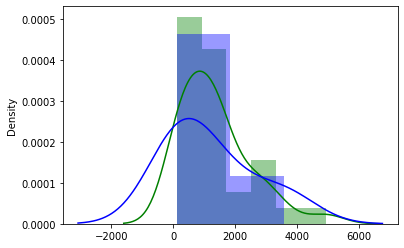

In [165]:
plt.figure()
sns.distplot(x=homicidios_2020, kde=True, color='g');
sns.distplot(x=prueba1, kde=True, color='b')
plt.show;

## Prueba z para muestra 2

In [146]:
prueba2 = data_muestra2['Total_homicidios']

In [147]:
ztest(prueba2, value=1352.03125) 

(-3.3082787224866976, 0.0009387133381536222)

In [148]:
prueba2.describe()

count       5.000000
mean      768.600000
std       394.341603
min       314.000000
25%       465.000000
50%       831.000000
75%       920.000000
max      1313.000000
Name: Total_homicidios, dtype: float64

In [160]:
t_test2, p_value2 = stats.ttest_1samp(prueba2, mean)
print (t_test2, p_value2)

-3.3082787224866976 0.029702241268912084


C:\Users\indir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\indir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


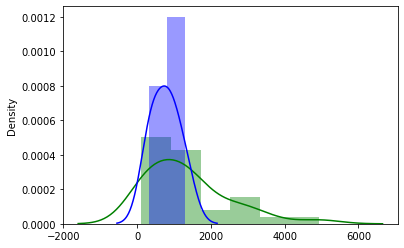

In [166]:
plt.figure()
sns.distplot(x=homicidios_2020, kde=True, color='g');
sns.distplot(x=prueba2, kde=True, color='b')
plt.show;

## Prueba z para muestra 3

In [149]:
prueba3 = data_muestra3['Total_homicidios']

In [150]:
ztest(prueba3, value=1352.03125) 

(-1.571195569325631, 0.11613722893114178)

In [151]:
prueba3.describe()

count       5.000000
mean      992.800000
std       511.244755
min       150.000000
25%       967.000000
50%      1065.000000
75%      1313.000000
max      1469.000000
Name: Total_homicidios, dtype: float64

In [162]:
t_test3, p_value3 = stats.ttest_1samp(prueba3, mean)
print (t_test3, p_value3)

-1.571195569325631 0.19123252534437485


C:\Users\indir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\indir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


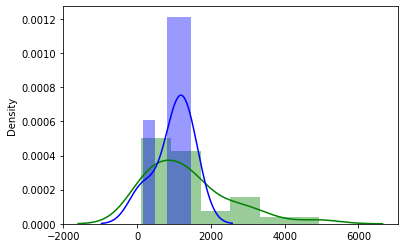

In [167]:
plt.figure()
sns.distplot(x=homicidios_2020, kde=True, color='g');
sns.distplot(x=prueba3, kde=True, color='b')
plt.show;

In [60]:
https://www.statisticshowto.com/welchs-test-for-unequal-variances/


SyntaxError: invalid syntax (Temp/ipykernel_23356/4140671995.py, line 1)